In [26]:
import numpy as np
import torch
import utils
import models
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import importlib
import pytorch_lightning as pl
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

# Fitting a Linear Function

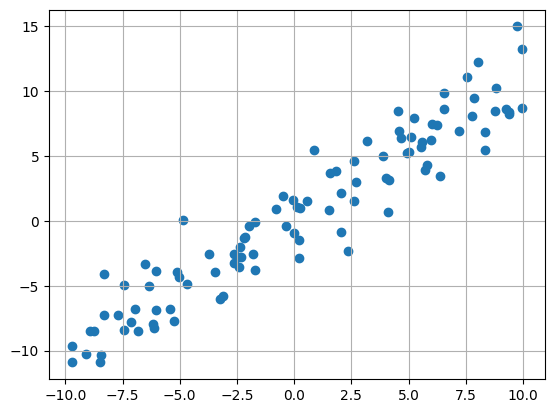

In [27]:
linear_data = utils.generate_noisy_data(utils.linear, datapoints= 100, std = 2, m = 1, b = 0)
linear_loader = DataLoader(utils.ToyDataset(*linear_data))

valid_linear_data = utils.generate_noisy_data(utils.linear, datapoints= 20, std = 2, m = 1, b = 0)
valid_linear_loader = DataLoader(utils.ToyDataset(*valid_linear_data))

plt.scatter(*linear_data)
plt.grid()
plt.show()

In [28]:
mlp = models.MLP(input_dim= 1, output_dim= 1, hidden_dim = 8, depth= 2, task = 'regression')
print(mlp)

MLP(
  (model): Sequential(
    (0): Linear(in_features=1, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=1, bias=True)
  )
  (accuracy): MeanSquaredError()
)


In [29]:
# early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=0.00, patience=3, verbose=True)
# trainer = pl.Trainer(callbacks=[early_stop_callback])

trainer = pl.Trainer(max_epochs=10)
trainer.fit(mlp, linear_loader, valid_linear_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name     | Type             | Params | Mode 
------------------------------------------------------
0 | model    | Sequential       | 169    | train
1 | accuracy | MeanSquaredError | 0      | train
------------------------------------------------------
169       Trainable params
0         Non-trainable params
169       Total params
0.001     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 100/100 [00:00<00:00, 310.76it/s, v_num=46, val_loss=3.690, valid_acc=nan.0, train_loss=4.150]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 100/100 [00:00<00:00, 307.73it/s, v_num=46, val_loss=3.690, valid_acc=nan.0, train_loss=4.150]


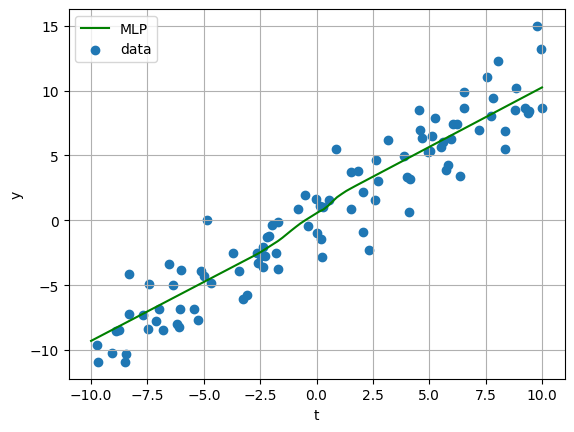

In [30]:
def show_preds(model, name, data = linear_data):
    ts = torch.linspace(-10, 10, 100)

    with torch.no_grad():
        preds = model(torch.unsqueeze(ts, dim = 1))

    plt.plot(ts.numpy(), preds.numpy(), 'g', label = name)

    plt.scatter(*data, label = 'data')
    plt.grid()
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend()
    plt.show()

show_preds(mlp, 'MLP')

In [31]:
asym_mlp = models.asymMLP(input_dim= 1, output_dim= 1, hidden_dim = 8, depth= 2, task = 'regression')
trainer2 = pl.Trainer(max_epochs=10)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [32]:
trainer2.fit(asym_mlp, linear_loader, valid_linear_loader)


  | Name     | Type             | Params | Mode 
------------------------------------------------------
0 | model    | Sequential       | 169    | train
1 | accuracy | MeanSquaredError | 0      | train
------------------------------------------------------
169       Trainable params
0         Non-trainable params
169       Total params
0.001     Total estimated model params size (MB)


Sanity Checking DataLoader 0:  50%|█████     | 1/2 [00:00<00:00, 435.55it/s]

Epoch 9: 100%|██████████| 100/100 [00:00<00:00, 305.00it/s, v_num=47, val_loss=37.60, valid_acc=nan.0, train_loss=42.30]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 100/100 [00:00<00:00, 301.89it/s, v_num=47, val_loss=37.60, valid_acc=nan.0, train_loss=42.30]


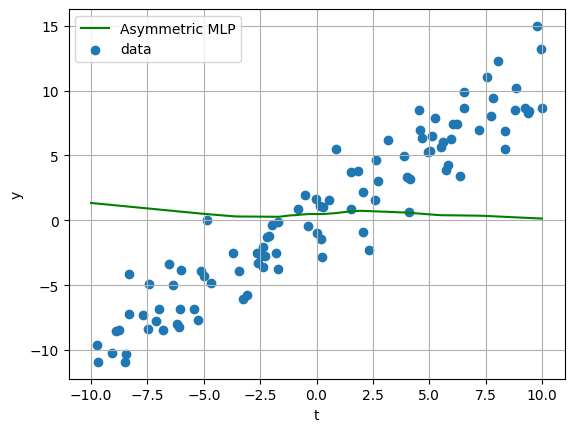

In [33]:
show_preds(asym_mlp, name = 'Asymmetric MLP')

In [34]:
trainer3 = pl.Trainer(max_epochs=100)
trainer3.fit(asym_mlp, linear_loader, valid_linear_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name     | Type             | Params | Mode 
------------------------------------------------------
0 | model    | Sequential       | 169    | train
1 | accuracy | MeanSquaredError | 0      | train
------------------------------------------------------
169       Trainable params
0         Non-trainable params
169       Total params
0.001     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 100/100 [00:00<00:00, 235.89it/s, v_num=48, val_loss=22.30, valid_acc=nan.0, train_loss=25.30]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 100/100 [00:00<00:00, 233.43it/s, v_num=48, val_loss=22.30, valid_acc=nan.0, train_loss=25.30]


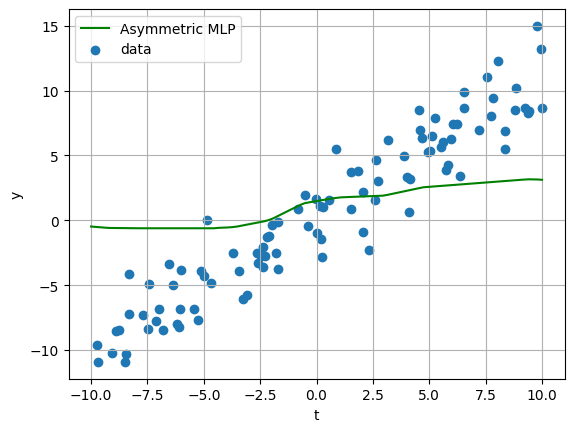

In [36]:
show_preds(asym_mlp, name = 'Asymmetric MLP')

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name     | Type             | Params | Mode 
------------------------------------------------------
0 | model    | Sequential       | 169    | train
1 | accuracy | MeanSquaredError | 0      | train
------------------------------------------------------
169       Trainable params
0         Non-trainable params
169       Total params
0.001     Total estimated model params size (MB)


Epoch 299: 100%|██████████| 100/100 [00:00<00:00, 227.64it/s, v_num=49, val_loss=4.680, valid_acc=nan.0, train_loss=5.540]

`Trainer.fit` stopped: `max_epochs=300` reached.


Epoch 299: 100%|██████████| 100/100 [00:00<00:00, 225.41it/s, v_num=49, val_loss=4.680, valid_acc=nan.0, train_loss=5.540]


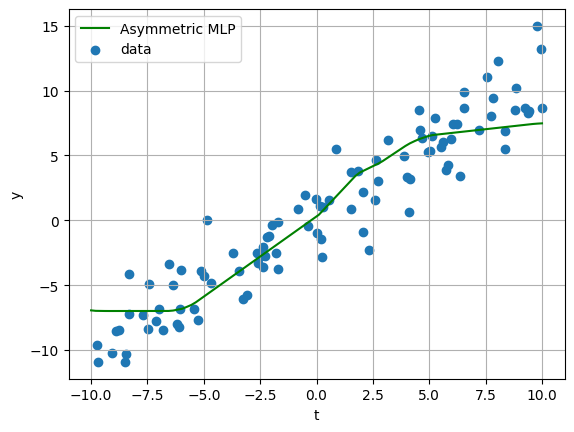

In [37]:
trainer3 = pl.Trainer(max_epochs=300)
trainer3.fit(asym_mlp, linear_loader, valid_linear_loader)
show_preds(asym_mlp, name = 'Asymmetric MLP')

# Fitting a polynomial

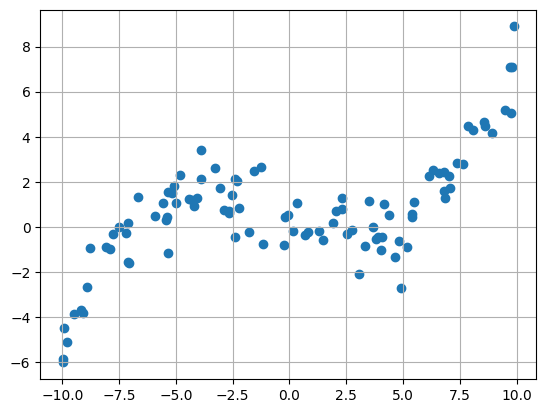

In [38]:
f_mlp = models.MLP(input_dim=1, output_dim=1, hidden_dim=8, depth=2, task='regression')

def poly(x):
    return 0.01*(x-1)*(x-5)*(x+7)

nonlinear_data = utils.generate_noisy_data(poly, datapoints= 100, std = 1)
nonlinear_loader = DataLoader(utils.ToyDataset(*nonlinear_data))

valid_nonlinear_data = utils.generate_noisy_data(poly, datapoints= 20, std = 1)
valid_nonlinear_loader = DataLoader(utils.ToyDataset(*valid_nonlinear_data))

plt.scatter(*nonlinear_data)
plt.grid()
plt.show()

In [39]:
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=0.00, patience=3, verbose=True)
trainer = pl.Trainer(callbacks=[early_stop_callback])

trainer.fit(f_mlp, nonlinear_loader, valid_nonlinear_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/kusha/Code/research/.venv/lib/python3.11/site-packages/pytorch_lightning/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.

  | Name     | Type             | Params | Mode 
------------------------------------------------------
0 | model    | Sequential       | 169    | train
1 | accuracy | MeanSquaredError | 0      | train
------------------------------------------------------
169       Trainable params
0         Non-trainable params
169       Total params
0.001     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 100/100 [00:00<00:00, 291.97it/s, v_num=50, val_loss=6.120, valid_acc=nan.0, train_loss=5.960]

Metric val_loss improved. New best score: 6.116


Epoch 1: 100%|██████████| 100/100 [00:00<00:00, 265.08it/s, v_num=50, val_loss=5.990, valid_acc=nan.0, train_loss=5.630]

Metric val_loss improved by 0.131 >= min_delta = 0.0. New best score: 5.985


Epoch 2: 100%|██████████| 100/100 [00:00<00:00, 234.20it/s, v_num=50, val_loss=5.850, valid_acc=nan.0, train_loss=5.340]

Metric val_loss improved by 0.135 >= min_delta = 0.0. New best score: 5.850


Epoch 3: 100%|██████████| 100/100 [00:00<00:00, 218.91it/s, v_num=50, val_loss=5.640, valid_acc=nan.0, train_loss=5.080]

Metric val_loss improved by 0.206 >= min_delta = 0.0. New best score: 5.644


Epoch 4: 100%|██████████| 100/100 [00:00<00:00, 179.71it/s, v_num=50, val_loss=5.320, valid_acc=nan.0, train_loss=4.780]

Metric val_loss improved by 0.320 >= min_delta = 0.0. New best score: 5.324


Epoch 5: 100%|██████████| 100/100 [00:00<00:00, 166.24it/s, v_num=50, val_loss=4.870, valid_acc=nan.0, train_loss=4.420]

Metric val_loss improved by 0.458 >= min_delta = 0.0. New best score: 4.866


Epoch 6: 100%|██████████| 100/100 [00:00<00:00, 148.20it/s, v_num=50, val_loss=4.220, valid_acc=nan.0, train_loss=3.950]

Metric val_loss improved by 0.649 >= min_delta = 0.0. New best score: 4.217


Epoch 7: 100%|██████████| 100/100 [00:00<00:00, 128.31it/s, v_num=50, val_loss=3.760, valid_acc=nan.0, train_loss=3.500]

Metric val_loss improved by 0.455 >= min_delta = 0.0. New best score: 3.763


Epoch 8: 100%|██████████| 100/100 [00:01<00:00, 99.40it/s, v_num=50, val_loss=3.550, valid_acc=nan.0, train_loss=3.220] 

Metric val_loss improved by 0.217 >= min_delta = 0.0. New best score: 3.546


Epoch 9: 100%|██████████| 100/100 [00:01<00:00, 74.77it/s, v_num=50, val_loss=3.410, valid_acc=nan.0, train_loss=3.060]

Metric val_loss improved by 0.140 >= min_delta = 0.0. New best score: 3.405


Epoch 10: 100%|██████████| 100/100 [00:02<00:00, 47.01it/s, v_num=50, val_loss=3.340, valid_acc=nan.0, train_loss=2.930]

Metric val_loss improved by 0.064 >= min_delta = 0.0. New best score: 3.341


Epoch 11: 100%|██████████| 100/100 [00:03<00:00, 28.75it/s, v_num=50, val_loss=3.240, valid_acc=nan.0, train_loss=2.830]

Metric val_loss improved by 0.106 >= min_delta = 0.0. New best score: 3.235


Epoch 12: 100%|██████████| 100/100 [00:02<00:00, 34.51it/s, v_num=50, val_loss=3.170, valid_acc=nan.0, train_loss=2.720]

Metric val_loss improved by 0.064 >= min_delta = 0.0. New best score: 3.171


Epoch 13: 100%|██████████| 100/100 [00:02<00:00, 40.46it/s, v_num=50, val_loss=3.080, valid_acc=nan.0, train_loss=2.630]

Metric val_loss improved by 0.089 >= min_delta = 0.0. New best score: 3.082


Epoch 14: 100%|██████████| 100/100 [00:02<00:00, 47.06it/s, v_num=50, val_loss=3.020, valid_acc=nan.0, train_loss=2.530]

Metric val_loss improved by 0.064 >= min_delta = 0.0. New best score: 3.017


Epoch 15: 100%|██████████| 100/100 [00:01<00:00, 59.96it/s, v_num=50, val_loss=2.940, valid_acc=nan.0, train_loss=2.440]

Metric val_loss improved by 0.077 >= min_delta = 0.0. New best score: 2.940


Epoch 16: 100%|██████████| 100/100 [00:01<00:00, 60.10it/s, v_num=50, val_loss=2.880, valid_acc=nan.0, train_loss=2.350]

Metric val_loss improved by 0.063 >= min_delta = 0.0. New best score: 2.877


Epoch 17: 100%|██████████| 100/100 [00:01<00:00, 71.78it/s, v_num=50, val_loss=2.810, valid_acc=nan.0, train_loss=2.250]

Metric val_loss improved by 0.071 >= min_delta = 0.0. New best score: 2.805


Epoch 18: 100%|██████████| 100/100 [00:00<00:00, 108.50it/s, v_num=50, val_loss=2.730, valid_acc=nan.0, train_loss=2.170]

Metric val_loss improved by 0.075 >= min_delta = 0.0. New best score: 2.730


Epoch 19: 100%|██████████| 100/100 [00:00<00:00, 160.21it/s, v_num=50, val_loss=2.700, valid_acc=nan.0, train_loss=2.060]

Metric val_loss improved by 0.032 >= min_delta = 0.0. New best score: 2.698


Epoch 20: 100%|██████████| 100/100 [00:00<00:00, 200.22it/s, v_num=50, val_loss=2.580, valid_acc=nan.0, train_loss=2.010]

Metric val_loss improved by 0.117 >= min_delta = 0.0. New best score: 2.581


Epoch 21: 100%|██████████| 100/100 [00:00<00:00, 211.14it/s, v_num=50, val_loss=2.450, valid_acc=nan.0, train_loss=1.900]

Metric val_loss improved by 0.132 >= min_delta = 0.0. New best score: 2.448


Epoch 22: 100%|██████████| 100/100 [00:00<00:00, 213.16it/s, v_num=50, val_loss=2.400, valid_acc=nan.0, train_loss=1.830]

Metric val_loss improved by 0.046 >= min_delta = 0.0. New best score: 2.403


Epoch 23: 100%|██████████| 100/100 [00:00<00:00, 241.32it/s, v_num=50, val_loss=2.320, valid_acc=nan.0, train_loss=1.740]

Metric val_loss improved by 0.083 >= min_delta = 0.0. New best score: 2.319


Epoch 24: 100%|██████████| 100/100 [00:00<00:00, 238.19it/s, v_num=50, val_loss=2.250, valid_acc=nan.0, train_loss=1.670]

Metric val_loss improved by 0.065 >= min_delta = 0.0. New best score: 2.254


Epoch 25: 100%|██████████| 100/100 [00:00<00:00, 221.08it/s, v_num=50, val_loss=2.170, valid_acc=nan.0, train_loss=1.620]

Metric val_loss improved by 0.079 >= min_delta = 0.0. New best score: 2.175


Epoch 26: 100%|██████████| 100/100 [00:00<00:00, 249.08it/s, v_num=50, val_loss=2.140, valid_acc=nan.0, train_loss=1.540]

Metric val_loss improved by 0.037 >= min_delta = 0.0. New best score: 2.138


Epoch 27: 100%|██████████| 100/100 [00:00<00:00, 242.77it/s, v_num=50, val_loss=2.050, valid_acc=nan.0, train_loss=1.490]

Metric val_loss improved by 0.085 >= min_delta = 0.0. New best score: 2.053


Epoch 28: 100%|██████████| 100/100 [00:00<00:00, 225.42it/s, v_num=50, val_loss=2.000, valid_acc=nan.0, train_loss=1.460]

Metric val_loss improved by 0.055 >= min_delta = 0.0. New best score: 1.998


Epoch 29: 100%|██████████| 100/100 [00:00<00:00, 236.66it/s, v_num=50, val_loss=1.970, valid_acc=nan.0, train_loss=1.400]

Metric val_loss improved by 0.028 >= min_delta = 0.0. New best score: 1.969


Epoch 30: 100%|██████████| 100/100 [00:00<00:00, 254.10it/s, v_num=50, val_loss=1.890, valid_acc=nan.0, train_loss=1.370]

Metric val_loss improved by 0.077 >= min_delta = 0.0. New best score: 1.892


Epoch 31: 100%|██████████| 100/100 [00:00<00:00, 204.12it/s, v_num=50, val_loss=1.850, valid_acc=nan.0, train_loss=1.310]

Metric val_loss improved by 0.045 >= min_delta = 0.0. New best score: 1.847


Epoch 32: 100%|██████████| 100/100 [00:00<00:00, 246.62it/s, v_num=50, val_loss=1.820, valid_acc=nan.0, train_loss=1.290]

Metric val_loss improved by 0.030 >= min_delta = 0.0. New best score: 1.817


Epoch 33: 100%|██████████| 100/100 [00:00<00:00, 231.59it/s, v_num=50, val_loss=1.780, valid_acc=nan.0, train_loss=1.250]

Metric val_loss improved by 0.039 >= min_delta = 0.0. New best score: 1.778


Epoch 34: 100%|██████████| 100/100 [00:00<00:00, 213.55it/s, v_num=50, val_loss=1.750, valid_acc=nan.0, train_loss=1.230]

Metric val_loss improved by 0.024 >= min_delta = 0.0. New best score: 1.754


Epoch 35: 100%|██████████| 100/100 [00:00<00:00, 233.84it/s, v_num=50, val_loss=1.730, valid_acc=nan.0, train_loss=1.200]

Metric val_loss improved by 0.029 >= min_delta = 0.0. New best score: 1.726


Epoch 36: 100%|██████████| 100/100 [00:00<00:00, 240.12it/s, v_num=50, val_loss=1.690, valid_acc=nan.0, train_loss=1.170]

Metric val_loss improved by 0.037 >= min_delta = 0.0. New best score: 1.689


Epoch 37: 100%|██████████| 100/100 [00:00<00:00, 220.03it/s, v_num=50, val_loss=1.680, valid_acc=nan.0, train_loss=1.160]

Metric val_loss improved by 0.009 >= min_delta = 0.0. New best score: 1.680


Epoch 38: 100%|██████████| 100/100 [00:00<00:00, 234.66it/s, v_num=50, val_loss=1.660, valid_acc=nan.0, train_loss=1.140]

Metric val_loss improved by 0.016 >= min_delta = 0.0. New best score: 1.664


Epoch 39: 100%|██████████| 100/100 [00:00<00:00, 227.78it/s, v_num=50, val_loss=1.630, valid_acc=nan.0, train_loss=1.120]

Metric val_loss improved by 0.037 >= min_delta = 0.0. New best score: 1.627


Epoch 41: 100%|██████████| 100/100 [00:00<00:00, 234.21it/s, v_num=50, val_loss=1.560, valid_acc=nan.0, train_loss=1.100]

Metric val_loss improved by 0.063 >= min_delta = 0.0. New best score: 1.564


Epoch 44: 100%|██████████| 100/100 [00:00<00:00, 215.20it/s, v_num=50, val_loss=1.530, valid_acc=nan.0, train_loss=1.070]

Metric val_loss improved by 0.032 >= min_delta = 0.0. New best score: 1.532


Epoch 46: 100%|██████████| 100/100 [00:00<00:00, 234.24it/s, v_num=50, val_loss=1.520, valid_acc=nan.0, train_loss=1.060]

Metric val_loss improved by 0.013 >= min_delta = 0.0. New best score: 1.520


Epoch 49: 100%|██████████| 100/100 [00:00<00:00, 226.08it/s, v_num=50, val_loss=1.500, valid_acc=nan.0, train_loss=1.030]

Metric val_loss improved by 0.016 >= min_delta = 0.0. New best score: 1.504


Epoch 50: 100%|██████████| 100/100 [00:00<00:00, 207.03it/s, v_num=50, val_loss=1.500, valid_acc=nan.0, train_loss=1.030]

Metric val_loss improved by 0.008 >= min_delta = 0.0. New best score: 1.495


Epoch 51: 100%|██████████| 100/100 [00:00<00:00, 225.17it/s, v_num=50, val_loss=1.490, valid_acc=nan.0, train_loss=1.030]

Metric val_loss improved by 0.007 >= min_delta = 0.0. New best score: 1.489


Epoch 52: 100%|██████████| 100/100 [00:00<00:00, 221.13it/s, v_num=50, val_loss=1.480, valid_acc=nan.0, train_loss=1.020]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 1.484


Epoch 53: 100%|██████████| 100/100 [00:00<00:00, 212.78it/s, v_num=50, val_loss=1.480, valid_acc=nan.0, train_loss=1.010]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 1.480


Epoch 55: 100%|██████████| 100/100 [00:00<00:00, 210.75it/s, v_num=50, val_loss=1.470, valid_acc=nan.0, train_loss=1.000]

Metric val_loss improved by 0.010 >= min_delta = 0.0. New best score: 1.471


Epoch 56: 100%|██████████| 100/100 [00:00<00:00, 208.93it/s, v_num=50, val_loss=1.460, valid_acc=nan.0, train_loss=1.010]

Metric val_loss improved by 0.015 >= min_delta = 0.0. New best score: 1.456


Epoch 57: 100%|██████████| 100/100 [00:00<00:00, 208.60it/s, v_num=50, val_loss=1.450, valid_acc=nan.0, train_loss=1.000]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 1.454


Epoch 58: 100%|██████████| 100/100 [00:00<00:00, 203.06it/s, v_num=50, val_loss=1.440, valid_acc=nan.0, train_loss=0.998]

Metric val_loss improved by 0.015 >= min_delta = 0.0. New best score: 1.439


Epoch 59: 100%|██████████| 100/100 [00:00<00:00, 231.19it/s, v_num=50, val_loss=1.430, valid_acc=nan.0, train_loss=0.998]

Metric val_loss improved by 0.012 >= min_delta = 0.0. New best score: 1.427


Epoch 61: 100%|██████████| 100/100 [00:00<00:00, 234.85it/s, v_num=50, val_loss=1.410, valid_acc=nan.0, train_loss=0.991]

Metric val_loss improved by 0.013 >= min_delta = 0.0. New best score: 1.415


Epoch 62: 100%|██████████| 100/100 [00:00<00:00, 234.65it/s, v_num=50, val_loss=1.400, valid_acc=nan.0, train_loss=0.988]

Metric val_loss improved by 0.010 >= min_delta = 0.0. New best score: 1.404


Epoch 65: 100%|██████████| 100/100 [00:00<00:00, 217.86it/s, v_num=50, val_loss=1.370, valid_acc=nan.0, train_loss=0.978]

Metric val_loss improved by 0.030 >= min_delta = 0.0. New best score: 1.374


Epoch 68: 100%|██████████| 100/100 [00:00<00:00, 236.12it/s, v_num=50, val_loss=1.390, valid_acc=nan.0, train_loss=0.970]

Monitored metric val_loss did not improve in the last 3 records. Best score: 1.374. Signaling Trainer to stop.


Epoch 68: 100%|██████████| 100/100 [00:00<00:00, 233.73it/s, v_num=50, val_loss=1.390, valid_acc=nan.0, train_loss=0.970]


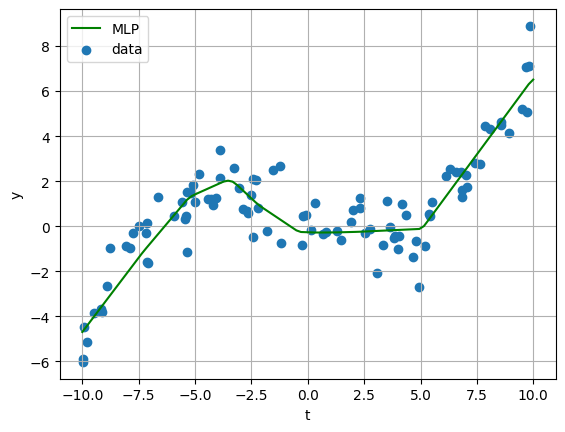

In [40]:
show_preds(f_mlp, 'MLP', nonlinear_data)

In [41]:
f_asym_mlp = models.asymMLP(input_dim=1, output_dim=1, hidden_dim=8, depth=2, task='regression')

trainer = pl.Trainer(max_epochs=100)
trainer.fit(f_asym_mlp, nonlinear_loader, valid_nonlinear_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name     | Type             | Params | Mode 
------------------------------------------------------
0 | model    | Sequential       | 169    | train
1 | accuracy | MeanSquaredError | 0      | train
------------------------------------------------------
169       Trainable params
0         Non-trainable params
169       Total params
0.001     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 100/100 [00:00<00:00, 271.90it/s, v_num=51, val_loss=3.800, valid_acc=nan.0, train_loss=3.200]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 100/100 [00:00<00:00, 269.74it/s, v_num=51, val_loss=3.800, valid_acc=nan.0, train_loss=3.200]


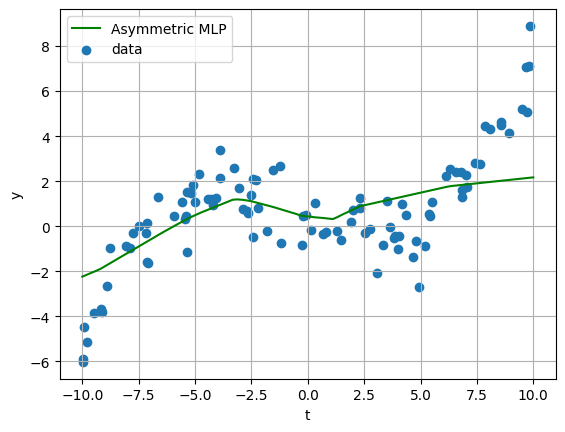

In [42]:
show_preds(f_asym_mlp, 'Asymmetric MLP', nonlinear_data)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name     | Type             | Params | Mode 
------------------------------------------------------
0 | model    | Sequential       | 169    | train
1 | accuracy | MeanSquaredError | 0      | train
------------------------------------------------------
169       Trainable params
0         Non-trainable params
169       Total params
0.001     Total estimated model params size (MB)


Epoch 499: 100%|██████████| 100/100 [00:00<00:00, 179.04it/s, v_num=52, val_loss=1.730, valid_acc=nan.0, train_loss=1.680]

`Trainer.fit` stopped: `max_epochs=500` reached.


Epoch 499: 100%|██████████| 100/100 [00:00<00:00, 177.40it/s, v_num=52, val_loss=1.730, valid_acc=nan.0, train_loss=1.680]


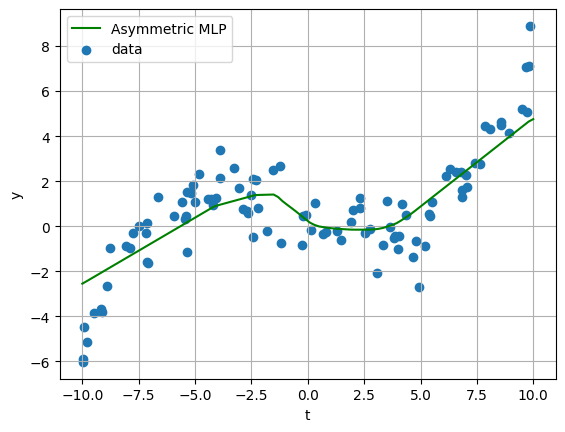

In [43]:
trainer = pl.Trainer(max_epochs=500)
trainer.fit(f_asym_mlp, nonlinear_loader, valid_nonlinear_loader)
show_preds(f_asym_mlp, 'Asymmetric MLP', nonlinear_data)